# Clasificación

Importamos algunas librerías que vamos a utilizar   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importamos el data set de vuelta

In [ ]:
ds_properati = pd.read_csv('nuevo_dataset_properati.csv')
ds_properati.drop(columns=['Unnamed: 0','geometry'], inplace=True)
ds_properati.head() 

,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency
0,2021-02-05,-34.554271,-58.457668,Capital Federal,BELGRANO,Venta,Departamento,2.0,1.0,59.0,59.0,178000.0,USD
1,2021-02-23,-34.571020,-58.433125,Capital Federal,PALERMO,Venta,Departamento,2.0,1.0,79.0,59.0,249000.0,USD
2,2021-12-16,-34.591646,-58.418064,Capital Federal,PALERMO,Venta,Departamento,1.0,1.0,37.0,32.0,105000.0,USD
3,2021-07-09,-34.618946,-58.360168,Capital Federal,PUERTO MADERO,Venta,Departamento,2.0,1.0,102.0,62.0,320000.0,USD
4,2021-03-22,-34.619732,-58.429620,Capital Federal,CABALLITO,Venta,Departamento,1.0,1.0,37.0,32.0,105000.0,USD


#### Construcción del target

Para esta sección crearemos una nueva variable tipo_precio que tendrá tres categorías: alto, medio, bajo. Esta nueva variable será nuestra clase en el problema de clasificación. Para determinar cuando el tipo_precio de una propiedad es alto, medio o bajo se deberá analizar el precio por metro cuadrado (pxm2).

Se divide a la variable en un número específico de bins
Los criterios de agrupamiento pueden ser por ejemplo:
● Igual-Frecuencia: La misma cantidad de observaciones en un bin
● Igual-Ancho: Definimos rangos o intervalos de clases para cada bin
● Cuantiles: Separar en intervalos utilizando Mediana, Cuantiles, Percentiles.

Creamos una nueva columna precio por metro cuadrado en el dataframe.

In [ ]:
ds_properati["precio_metro_cuadrado"] = ds_properati["property_price"] / ds_properati["property_surface_total"]
ds_properati.head()

,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,precio_metro_cuadrado
0,2021-02-05,-34.554271,-58.457668,Capital Federal,BELGRANO,Venta,Departamento,2.0,1.0,59.0,59.0,178000.0,USD,3016.949153
1,2021-02-23,-34.571020,-58.433125,Capital Federal,PALERMO,Venta,Departamento,2.0,1.0,79.0,59.0,249000.0,USD,3151.898734
2,2021-12-16,-34.591646,-58.418064,Capital Federal,PALERMO,Venta,Departamento,1.0,1.0,37.0,32.0,105000.0,USD,2837.837838
3,2021-07-09,-34.618946,-58.360168,Capital Federal,PUERTO MADERO,Venta,Departamento,2.0,1.0,102.0,62.0,320000.0,USD,3137.254902
4,2021-03-22,-34.619732,-58.429620,Capital Federal,CABALLITO,Venta,Departamento,1.0,1.0,37.0,32.0,105000.0,USD,2837.837838


Ahora la discretizamos en 3 intervalos de igual cantidad de observaciones.

In [ ]:
ds_discreto = ds_properati.loc[:,"precio_metro_cuadrado"]

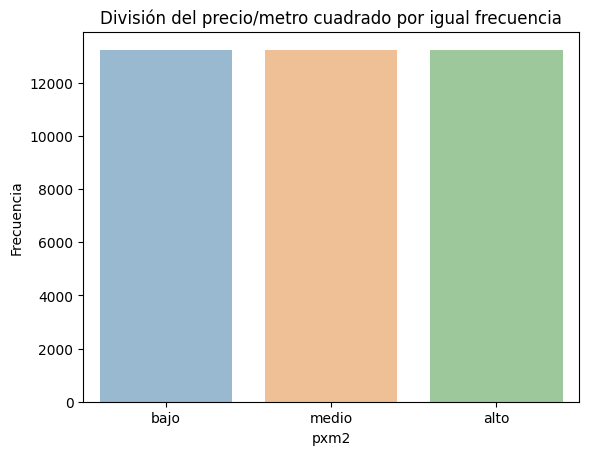

In [ ]:
labels=["bajo","medio","alto"]
def dist_equitativa(dataframe):
    dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)

    ds_bygroup = dataframe.groupby(['pxm2_igual_frec']).count()  

    eje_x = ds_bygroup.index.tolist()  
    eje_y = ds_bygroup['precio_metro_cuadrado'].tolist()  

    sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_bygroup ,alpha=0.5).set(title="División del precio/metro cuadrado por igual frecuencia",ylabel='Frecuencia',xlabel='pxm2')
    plt.show()
    return dataframe
dataframe_copy = ds_properati.copy()
dataframe_equitativa = dist_equitativa(dataframe_copy)

Ahora dividimos en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.


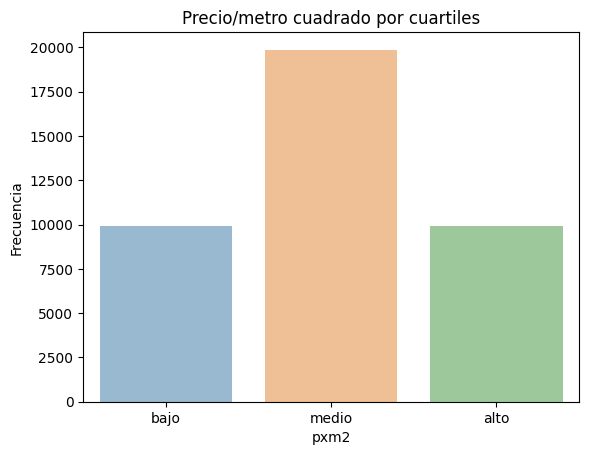

In [ ]:
labels=["bajo","medio","alto"]
dataframe = ds_properati.copy()

def dist_25_50_25(dataframe, description):
    dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)

    #Gráfico de barras con Seaborn
    ds_bygroup=dataframe.groupby(['pxm2_25_50_25']).count()  #Calculo la frecuencia de cada categoría

    eje_x = ds_bygroup.index.tolist()   ## Declaramos valores para el eje x
    eje_y = ds_bygroup['precio_metro_cuadrado'].tolist()  ## Declaramos valores para el eje y

    sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_bygroup ,alpha=0.5).set(title=description,ylabel='Frecuencia',xlabel='pxm2')
    plt.show()
    return dataframe
    
dataframe = ds_properati.copy()
dataframe_20_50_25 = dist_25_50_25(dataframe, "Precio/metro cuadrado por cuartiles")

Ahora vamos a filtrar por tipo de propiedad y luego dividir como en el punto anterior.

Primero con la propiedad de Departamento

Mostramos la distribución equitativa del tipo departamento

/tmp/ipykernel_89/2984446388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)


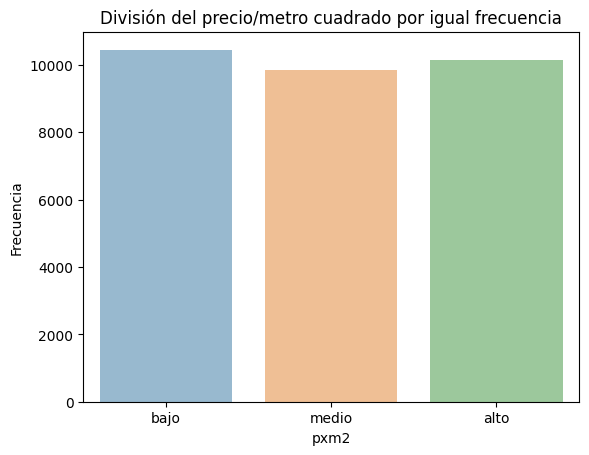

In [ ]:
ds_properati_depto = ds_properati.loc[ds_properati["property_type"]=="Departamento"]
ds_equitativa_depto = dist_equitativa(ds_properati_depto)

Mostramos la distribución 25_50_25 del tipo departamento

/tmp/ipykernel_89/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


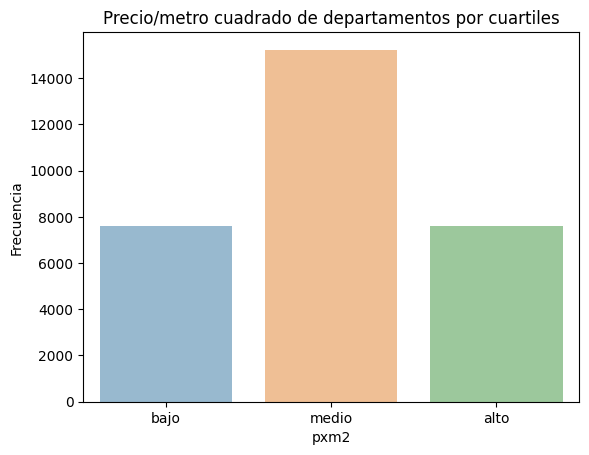

In [ ]:
ds_properati_depto = ds_properati.loc[ds_properati["property_type"]=="Departamento"]
dataframe_depto_25_50_25 = dist_25_50_25(ds_properati_depto,"Precio/metro cuadrado de departamentos por cuartiles")

Mostramos la distribucion equitativa de la casa :

/tmp/ipykernel_89/2984446388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)


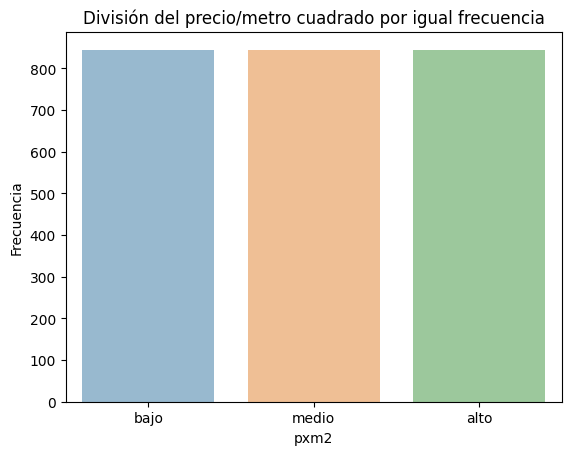

In [ ]:
ds_properati_casa = ds_properati.loc[ds_properati["property_type"]=="Casa"]
ds_equitativa_casa = dist_equitativa(ds_properati_casa)

/tmp/ipykernel_89/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


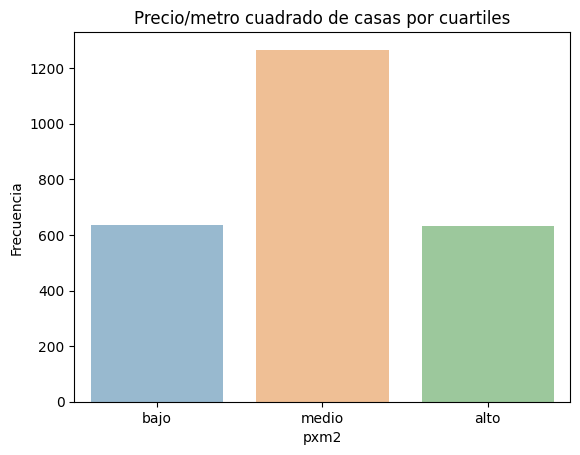

In [ ]:
ds_properati_casa = ds_properati.loc[ds_properati["property_type"]=="Casa"]
dataframe_casa_25_50_25 = dist_25_50_25(ds_properati_casa, "Precio/metro cuadrado de casas por cuartiles")

Por ultimo mostramos del tipo Ph 

/tmp/ipykernel_89/2984446388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)


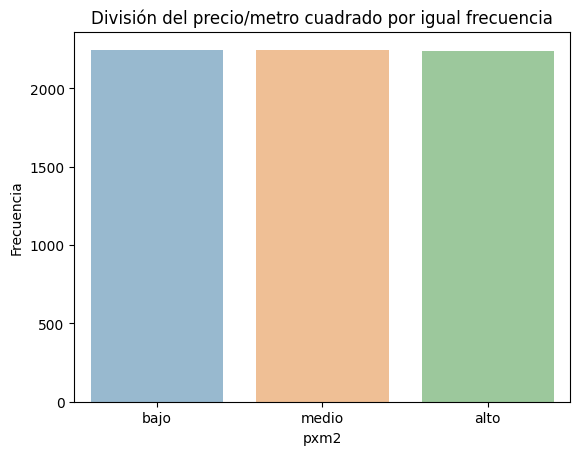

In [ ]:
ds_properati_ph = ds_properati.loc[ds_properati["property_type"]=="PH"]
ds_equitativa_ph = dist_equitativa(ds_properati_ph)

/tmp/ipykernel_89/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


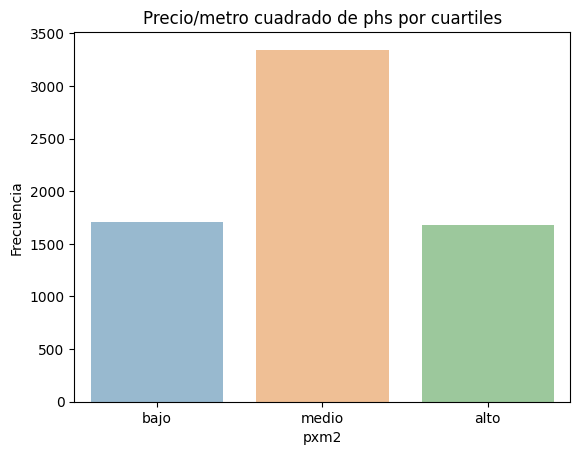

In [ ]:
ds_properati_ph = ds_properati.loc[ds_properati["property_type"]=="PH"]
dataframe_ph_25_50_25 = dist_25_50_25(ds_properati_ph, "Precio/metro cuadrado de phs por cuartiles")

Mostramos la distribución del precio por metro cuadrado de todo el database:

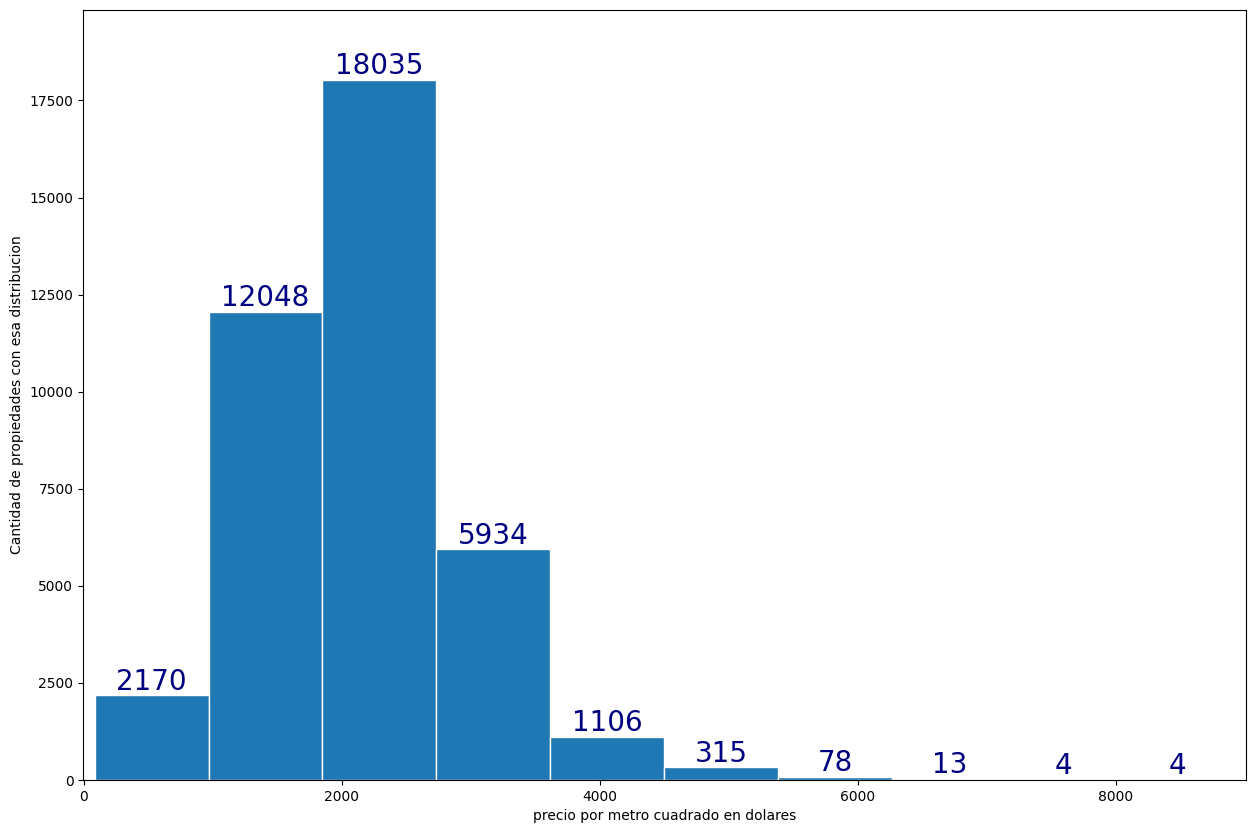

In [ ]:

plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distribucion precio por metro cuadrado todo dataset')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()


Ahora mostramos la distribución del precio por metro cuadrado especificando el tipo de propiedad

1-Distribución de precio por metro cuadrado de departamentos:

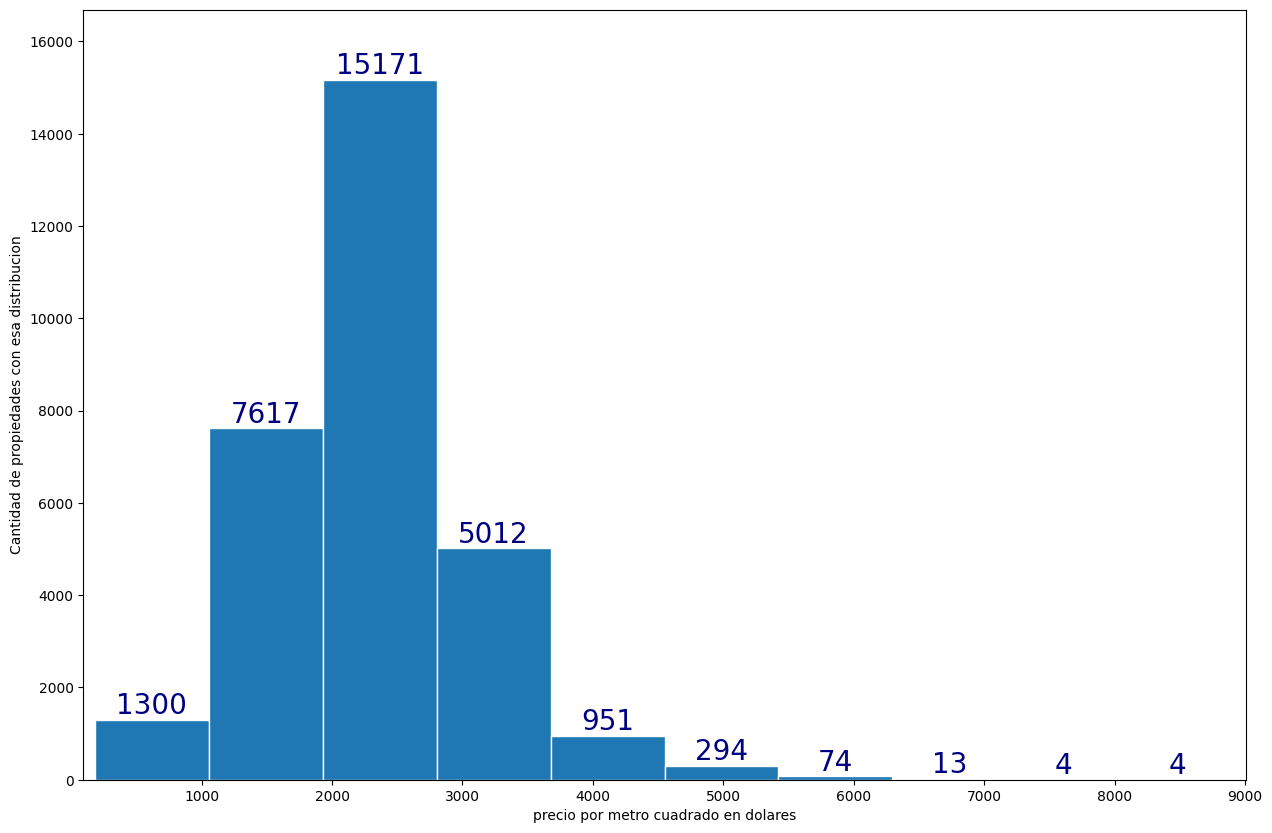

In [ ]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_depto['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de departamentos')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

2-Distribución de precio por metro cuadrado de casas:

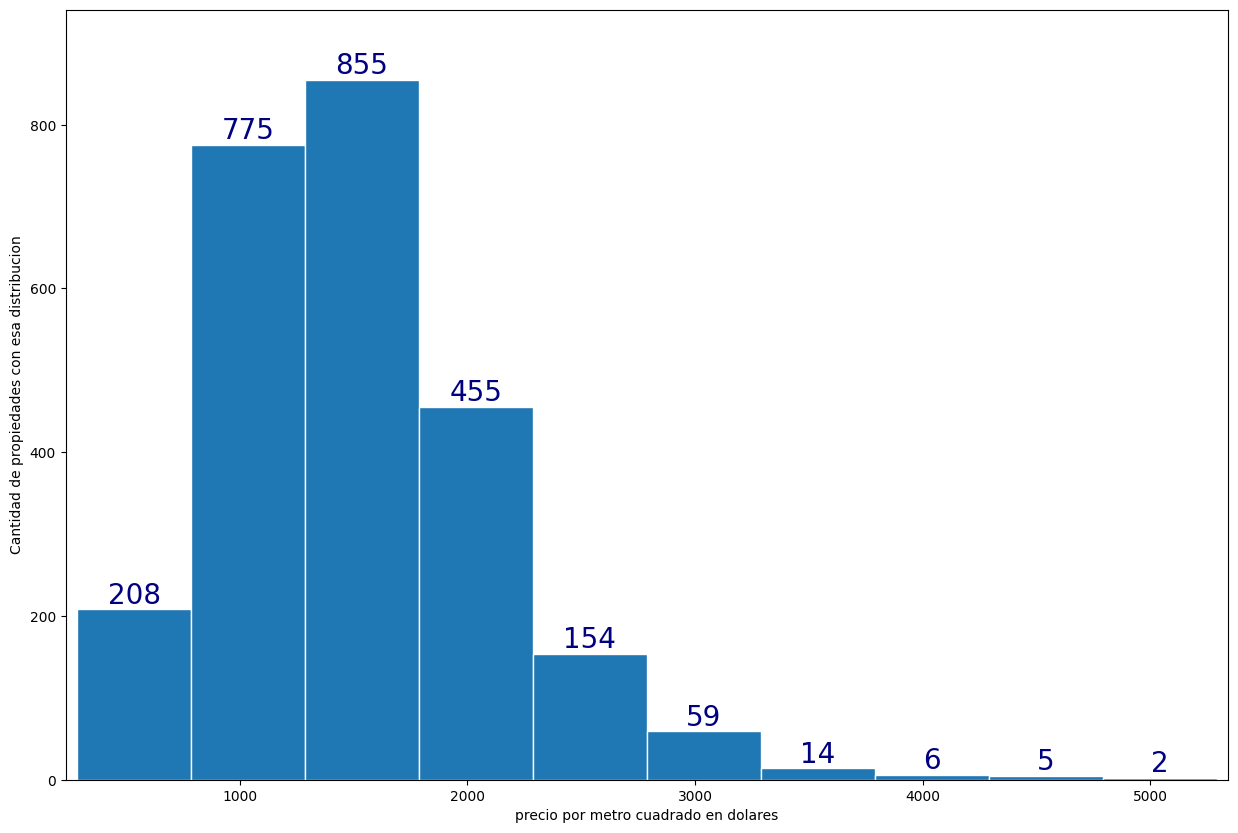

In [ ]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_casa['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de casas')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

3-Distribución de precio por metro cuadrado de PHs:

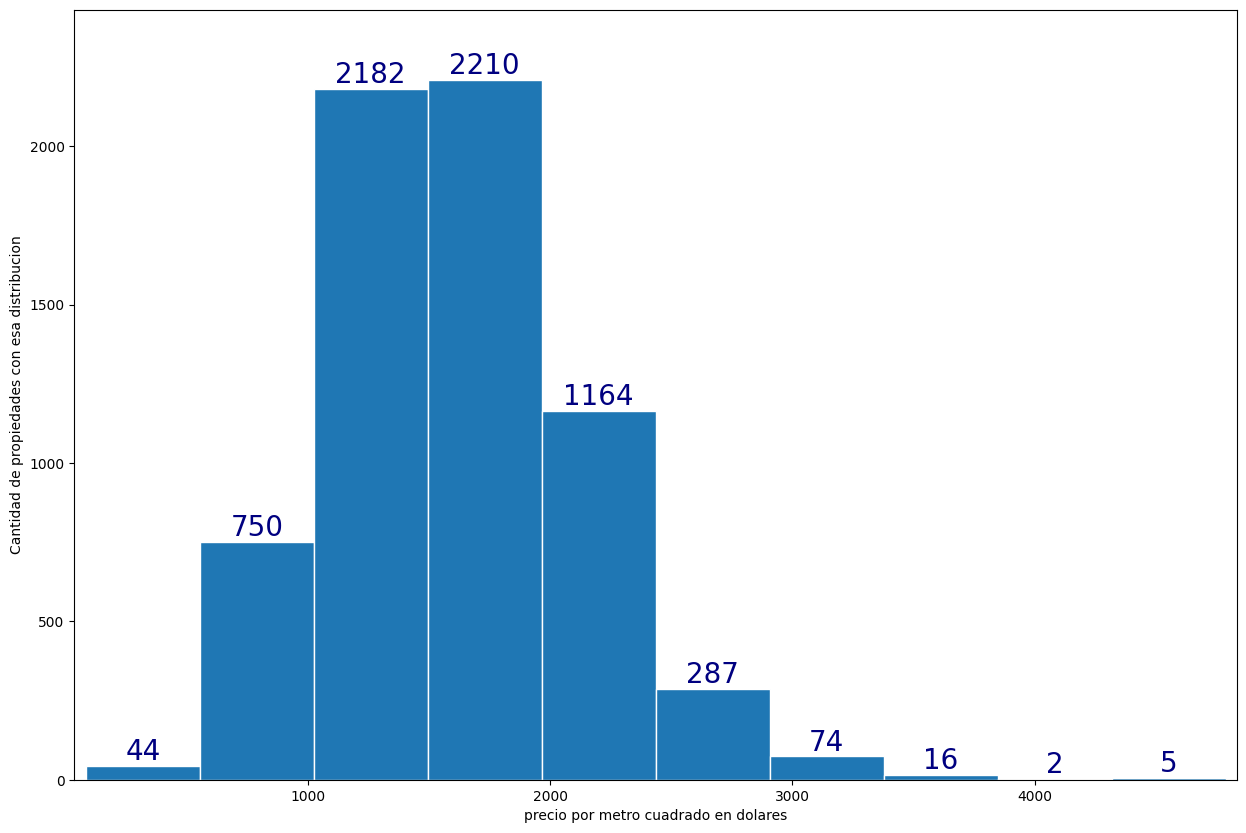

In [ ]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_ph['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de ph')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

### Selección de una alternativa para el análisis de la variable tipo_precio:

Se determinó que la mejor alternativa para el análisis de la variable tipo_precio era trabajar la variable precio_metro_cuadrado en base al tipo_de_propiedad, separando a precio_metro_cuadrado en 3 intervalos con la misma cantidad de observaciones. Esto es para tener un dataset balanceado y que los modelos intenten predecir a las 3 clases de forma equitativa.

Al separar por tipo de propiedad se evita el problema de mezclar todos los tipos en uno solo, lo cual llevaría a hacer análisis erróneos.

Añadimos la columna "tipo_precio" al dataset original

In [ ]:
ds_properati.loc[ds_equitativa_casa.index,"tipo_precio"] = ds_equitativa_casa["pxm2_igual_frec"] 
ds_properati.loc[ds_equitativa_ph.index,"tipo_precio"] = ds_equitativa_ph["pxm2_igual_frec"] 
ds_properati.loc[ds_equitativa_depto.index,"tipo_precio"] = ds_equitativa_depto["pxm2_igual_frec"] 

ds_properati.head()

,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,precio_metro_cuadrado,tipo_precio
0,2021-02-05,-34.554271,-58.457668,Capital Federal,BELGRANO,Venta,Departamento,2.0,1.0,59.0,59.0,178000.0,USD,3016.949153,alto
1,2021-02-23,-34.571020,-58.433125,Capital Federal,PALERMO,Venta,Departamento,2.0,1.0,79.0,59.0,249000.0,USD,3151.898734,alto
2,2021-12-16,-34.591646,-58.418064,Capital Federal,PALERMO,Venta,Departamento,1.0,1.0,37.0,32.0,105000.0,USD,2837.837838,alto
3,2021-07-09,-34.618946,-58.360168,Capital Federal,PUERTO MADERO,Venta,Departamento,2.0,1.0,102.0,62.0,320000.0,USD,3137.254902,alto
4,2021-03-22,-34.619732,-58.429620,Capital Federal,CABALLITO,Venta,Departamento,1.0,1.0,37.0,32.0,105000.0,USD,2837.837838,alto


### Gráfico CABA

Graficamos los avisos coloreados según la alternativa elegida:

In [ ]:
!pip install geopandas
import geopandas as gp
from seaborn import color_palette

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


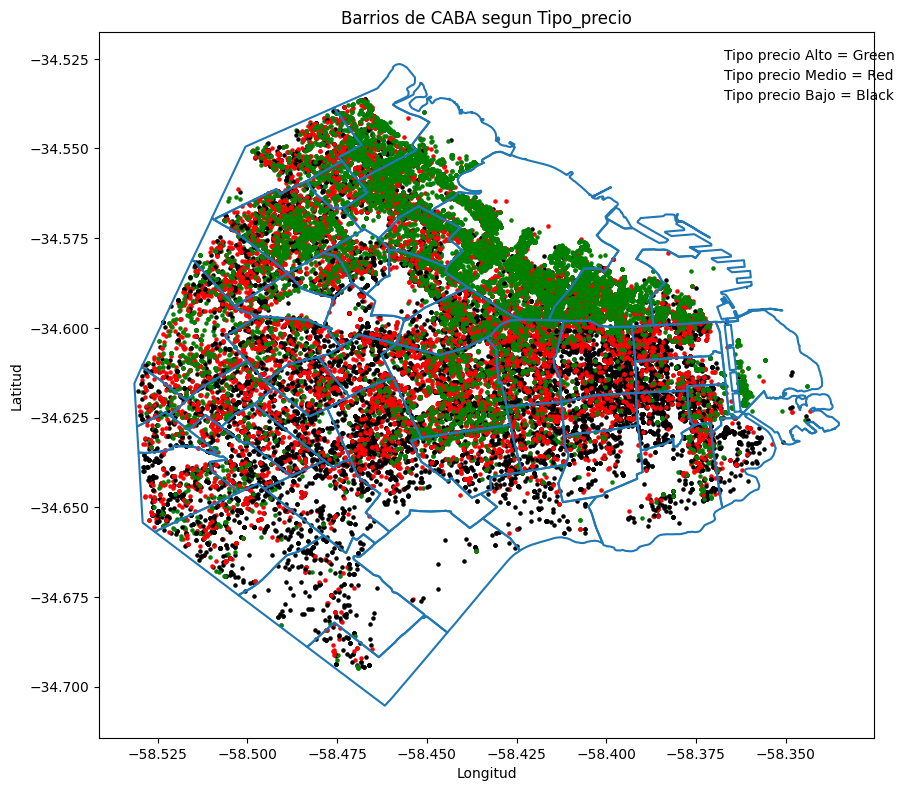

In [ ]:

def points_segun_tipo(dataframe,tipo):
    dataframe_tipo = dataframe[dataframe["pxm2_igual_frec"] == tipo]
    latitud = dataframe_tipo.latitud
    longitud = dataframe_tipo.longitud
    points = gp.GeoDataFrame(dataframe_tipo, geometry=gp.points_from_xy(longitud,latitud)) 
    return points

def graficar_caba(lista_dataframe):
    fig, ax = plt.subplots(figsize=(10,10))
    poligonos = gp.read_file("barrios.geojson")
    ax.set_title('Barrios de CABA segun Tipo_precio')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    poligonos.boundary.plot(ax=ax);
    for dataframe in lista_dataframe:
        points_bajos = points_segun_tipo(dataframe,"bajo")
        points_bajos.plot(ax=ax,markersize=5,color="black")

        points_medio = points_segun_tipo(dataframe,"medio")
        points_medio.plot(ax=ax,markersize=5,color="red")

        points_alto = points_segun_tipo(dataframe,"alto")
        points_alto.plot(ax=ax,markersize=5,color="green")
    plt.figtext(.75, .82, "Tipo precio Alto = Green")
    plt.figtext(.75, .80, "Tipo precio Medio = Red")
    plt.figtext(.75, .78, "Tipo precio Bajo = Black")

    plt.show()

tres_datas = [ds_equitativa_casa,ds_equitativa_ph,ds_equitativa_depto]
graficar_caba(tres_datas)

Compararemos esta clasificación contra el agrupamiento resultante de k-means. Para eso importamos el plot obtenido en kmeans.
![](mapaKmeans.png)

Vemos que:
- En la zona de la costanera y Puerto Madero en ambos casos está coloreada más "fuerte" indicando precios más altos.
- Por Villa Soldati y zonas adyacentes de menos recursos notamos que en ambos casos aparecen puntos de color más oscuro.
- En las zonas intermedias de la ciudad hay una mezcla de los 3 tipos.

### Entrenamiento y Predicción

En esta parte se pide predecir el valor del tipo_precio excluyendo la variable price, precio por metro cuadrado y otra que pueda contener información del precio de venta.

Para cumplir con lo pedido se hacen uso de distintos modelos que permiten predecir el valor de la variable tipo_precio:

- Árbol de decisión.

-  Random forest.

- A elección (completarrrrrrrrrrrrrrrrrrrrrrr).

Para cada uno de los modelos trabajados es necesario hacer un trabajo de transformación de datos, de forma de tener un buen rendimiento en cada modelo usado.

- Transformaciones Árbol de decisión: Es necesario realizar transformaciones sobre variables categóricas de forma que tengan valores numéricos. Para poder realizar dicha transformación se hace uso de la técnica de One Hot Encoding.

NOTA: AVISAR CUALQUIER OTRA TRANSFORMACIÓN REALIZADA.

- Transformaciones Random Forest: 

Importamos las librerías que usaremos

In [ ]:
#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Creamos un dataset con los features que usaremos para clasificar

In [ ]:
ds_properati.columns.to_list()


['created_on',
 'latitud',
 'longitud',
 'provincia',
 'barrio',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'precio_metro_cuadrado',
 'tipo_precio']

Convertimos la columna de precio_metro_cuadrado a int para usarla en el random forest.

In [ ]:
ds_properati['precio_metro_cuadrado'] = ds_properati['precio_metro_cuadrado'].astype(int)
ds_properati_x = ds_properati.drop(['property_price','precio_metro_cuadrado','tipo_precio'], axis='columns', inplace=False)

Creamos el dataset con la variable target

In [ ]:
ds_properati_y = ds_properati['tipo_precio'].copy()

In [ ]:
#Verifico balanceo de clases
ds_properati['tipo_precio'].value_counts(normalize=True)*100

bajo     34.107336
alto     33.326617
medio    32.566046
Name: tipo_precio, dtype: float64

Generamos los conjuntos de train y test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ds_properati_x,
                                                    ds_properati_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2,
                                                    ) 

In [ ]:
#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

# Datos Entrenamiento: 27794
# Datos Prueba: 11913


### Modelo 1: Árbol de decisión

Se pide la creación de un árbol de decisión con los hiperparámetros más adecuados mediante validación cruzada.

Buscamos la mejor combinación de hiperparámetros.

Exploramos un espacio de búsqueda, usando k-fold Cross Validation para medir el desempeño de cada combinación. Hacemos un Random search.

Se eliminan aquellas columnas del dataset que contengan variables categóricas de único valor. Estas son, la provincia (Capital Federal), el tipo de operación (venta), la moneda (USD). 
Al ser variables con un único valor (no analizamos otras en este tp) no aportan información relevante para el árbol de decisión.
Por otro lado, se realiza One Hot Encoding a las variables categóricas que sí interesan para clasificar.

In [ ]:
ds_arbol = ds_properati.copy()
ds_arbol = pd.get_dummies(ds_arbol, columns=['property_type', 'barrio'])
ds_arbol.drop(columns=['created_on', 'property_currency', 'operation', 'provincia'], inplace=True)

#volvemos a separar en train-test
ds_arbol_y = ds_arbol['tipo_precio'].copy()
ds_arbol_x = ds_arbol.drop(['property_price','precio_metro_cuadrado','tipo_precio'], axis='columns', inplace=False)

x_train_arbol, x_test_arbol, y_train_arbol, y_test_arbol = train_test_split(ds_arbol_x,
                                                    ds_arbol_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2,
                                                    )

Como primer paso entrenamos el modelo con parámetros elegidos al azar y vemos como resulta.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
!pip install pydotplus
from six import StringIO
from sklearn.metrics import confusion_matrix, classification_report , f1_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 KB 32.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=9ef4695667a148d90f6974fc596204521cd8c1759d03b592fdf336f3e930500d
  Stored in directory: /root/.cache/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:

arbol1 = DecisionTreeClassifier(random_state=2, ccp_alpha=0.0003, criterion='entropy', min_samples_leaf=5, min_samples_split=6)

model_train1 = arbol1.fit(x_train_arbol,y_train_arbol)

reglas = export_text(arbol1, feature_names=list(ds_arbol_x.columns))
print(reglas)

|--- latitud <= -34.60
|   |--- barrio_PUERTO MADERO <= 0.50
|   |   |--- barrio_CABALLITO <= 0.50
|   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |--- property_surface_total <= 100.50
|   |   |   |   |   |--- latitud <= -34.61
|   |   |   |   |   |   |--- property_surface_total <= 80.50
|   |   |   |   |   |   |   |--- longitud <= -58.41
|   |   |   |   |   |   |   |   |--- latitud <= -34.63
|   |   |   |   |   |   |   |   |   |--- property_surface_total <= 46.50
|   |   |   |   |   |   |   |   |   |   |--- property_surface_covered <= 36.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: alto
|   |   |   |   |   |   |   |   |   |   |--- property_surface_covered >  36.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: medio
|   |   |   |   |   |   |   |   |   |--- property_surface_total >  46.50
|   |   |   |   |   |   |   |   |   |   |--- property_surface_covered <= 40.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|

              precision    recall  f1-score   support

        alto       0.70      0.76      0.73      9268
        bajo       0.75      0.77      0.76      9520
       medio       0.58      0.52      0.55      9006

    accuracy                           0.68     27794
   macro avg       0.68      0.68      0.68     27794
weighted avg       0.68      0.68      0.68     27794

F1-Score: 0.6830251133338131


Text(50.722222222222214, 0.5, 'True')

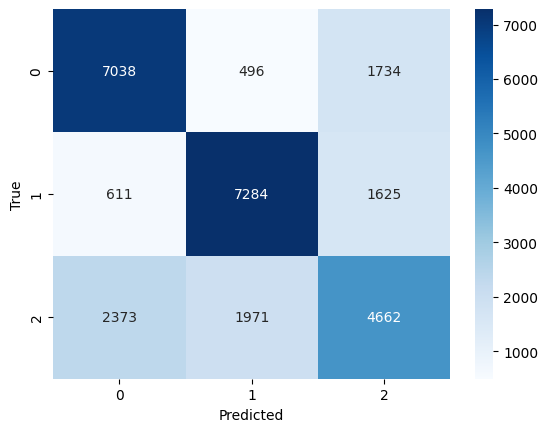

In [ ]:
y_pred_train = arbol1.predict(x_train_arbol)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train_arbol,y_pred_train))
print('F1-Score: {}'.format(f1_score(y_train_arbol, y_pred_train, average='micro')))

cm = confusion_matrix(y_train_arbol,y_pred_train)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

              precision    recall  f1-score   support

        alto       0.65      0.70      0.67      3965
        bajo       0.67      0.70      0.68      4023
       medio       0.49      0.43      0.46      3925

    accuracy                           0.61     11913
   macro avg       0.60      0.61      0.60     11913
weighted avg       0.60      0.61      0.60     11913

F1-Score: 0.6090825148996895


Text(50.722222222222214, 0.5, 'True')

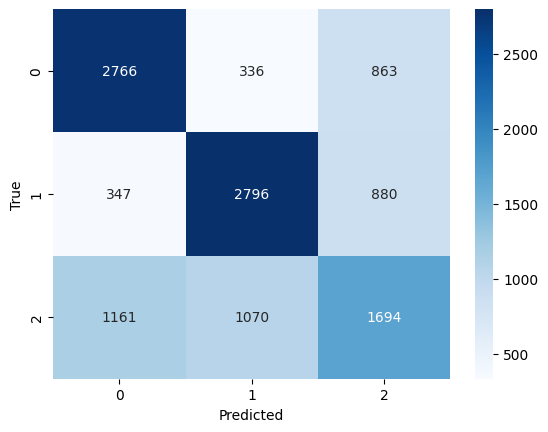

In [ ]:
#Lo probamos en test
y_pred = arbol1.predict(x_test_arbol)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test_arbol,y_pred))
print('F1-Score: {}'.format(f1_score(y_test_arbol, y_pred, average='micro')))

cm = confusion_matrix(y_test_arbol,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Vemos que al parecer el modelo entrenado con parámetros sin optimizar funciona muy bien en train pero en test bajan un poco sus métricas. Es posible que esté overfitteado.

**Optimizamos los hiperparámetros**
Tomamos 5 folds y como métrica F1 Score dado que evalúa tanto precisión como recall. Como tenemos +2 categorías tuvimos que elegir un average entre:
- macro: Calcula métricas para cada etiqueta y encuentre su media no ponderada. Esto no tiene en cuenta el desequilibrio de etiquetas.
- micro: Calcula métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.
- weighted: Calcula métricas para cada etiqueta y encuentra su promedio ponderado por soporte (la cantidad de instancias verdaderas para cada etiqueta). Con el promedio ponderado, el promedio de salida habría representado la contribución de cada clase ponderada por el número de ejemplos de esa clase dada.
(El soporte se refiere al número de ocurrencias reales de la clase en el conjunto de datos)

Elegimos micro dado que no tenemos clases desbalanceadas que necesitemos balancear.

In [ ]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import sklearn as sk

#Cantidad de combinaciones que queremos probar
n = 15

#Conjunto de parámetros que queremos usar
params = {'criterion':['gini','entropy'],
            'min_samples_leaf':list(range(2,10)),
            'min_samples_split': list(range(2,10)),
            'ccp_alpha':np.linspace(0,0.0005,n), 
            'max_depth':list(range(1,5)),
            }
                
#Cantidad de splits para el Cross Validation
folds = 5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier(random_state=2) 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score, average='micro')

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n, error_score='raise') 

#Buscamos los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train_arbol,y_train_arbol)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=DecisionTreeClassifier(random_state=2), n_iter=15,
                   param_distributions={'ccp_alpha': array([0.00000000e+00, 3.57142857e-05, 7.14285714e-05, 1.07142857e-04,
       1.42857143e-04, 1.78571429e-04, 2.14285714e-04, 2.50000000e-04,
       2.85714286e-04, 3.21428571e-04, 3.57142857e-04, 3.92857143e-04,
       4.28571429e-04, 4.64285714e-04, 5.00000000e-04]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9]},
                   scoring=make_scorer(f1_score, average=micro))

A continuación mostramos los mejores parámetros y la mejor métrica que resultaron para el árbol de clasificación:

In [ ]:
print(randomcv.best_params_)

print(randomcv.best_score_)

{'min_samples_split': 7, 'min_samples_leaf': 8, 'max_depth': 4, 'criterion': 'gini', 'ccp_alpha': 0.00010714285714285715}
0.5465568900358424


Creamos un clasificador con los hiperparámetros resultantes de CV

In [ ]:
#Creo el árbol con los mejores hiperparámetros
arbol = DecisionTreeClassifier(random_state=2).set_params(**randomcv.best_params_)
model_train = arbol.fit(x_train_arbol,y_train_arbol)
reglas = export_text(arbol, feature_names=list(ds_arbol_x.columns))
print(reglas)

|--- latitud <= -34.60
|   |--- barrio_PUERTO MADERO <= 0.50
|   |   |--- property_surface_total <= 111.23
|   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |--- class: medio
|   |   |   |--- property_type_Departamento >  0.50
|   |   |   |   |--- class: bajo
|   |   |--- property_surface_total >  111.23
|   |   |   |--- property_bedrooms <= 1.50
|   |   |   |   |--- class: bajo
|   |   |   |--- property_bedrooms >  1.50
|   |   |   |   |--- class: bajo
|   |--- barrio_PUERTO MADERO >  0.50
|   |   |--- property_surface_total <= 81.00
|   |   |   |--- class: alto
|   |   |--- property_surface_total >  81.00
|   |   |   |--- longitud <= -58.36
|   |   |   |   |--- class: bajo
|   |   |   |--- longitud >  -58.36
|   |   |   |   |--- class: alto
|--- latitud >  -34.60
|   |--- property_surface_total <= 111.23
|   |   |--- longitud <= -58.46
|   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |--- class: alto
|   |   |   |--- property_type_Departamento >  

Importamos las librerias que necesitamos para graficar el árbol de decisión

Matriz de confusión y performance en train

              precision    recall  f1-score   support

        alto       0.61      0.64      0.62      9268
        bajo       0.57      0.73      0.64      9520
       medio       0.40      0.26      0.32      9006

    accuracy                           0.55     27794
   macro avg       0.53      0.54      0.53     27794
weighted avg       0.53      0.55      0.53     27794

F1-Score: 0.5478160754119594


Text(50.722222222222214, 0.5, 'True')

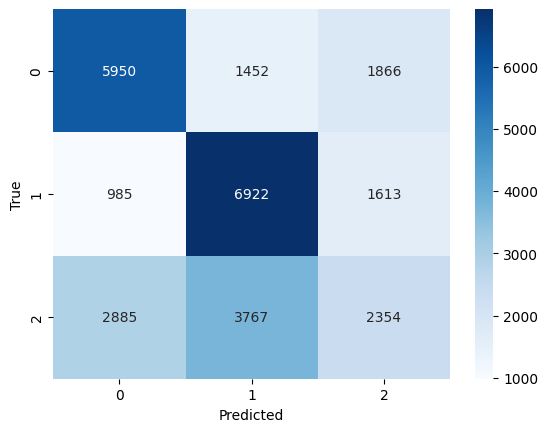

In [ ]:
y_pred_train = arbol.predict(x_train_arbol)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train_arbol,y_pred_train))
print('F1-Score: {}'.format(f1_score(y_train_arbol, y_pred_train, average='micro')))

cm = confusion_matrix(y_train_arbol,y_pred_train)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
plt.figure(figsize=(100,100))

tree_plot_completo = tree.plot_tree(model_train,
                                 feature_names=ds_arbol_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=model_train.classes_,
                                 max_depth=2) #model.classes_
plt.show(tree_plot_completo)

Matriz de confusión y performance en test

              precision    recall  f1-score   support

        alto       0.59      0.63      0.61      3965
        bajo       0.55      0.71      0.62      4023
       medio       0.41      0.26      0.32      3925

    accuracy                           0.54     11913
   macro avg       0.52      0.53      0.52     11913
weighted avg       0.52      0.54      0.52     11913

F1-Score: 0.5352975740787375


Text(50.722222222222214, 0.5, 'True')

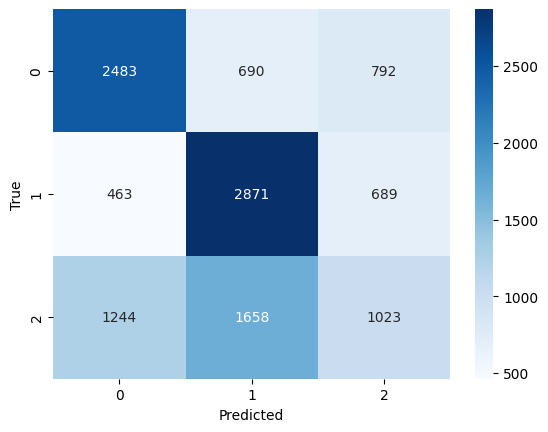

In [ ]:
#Hago predicción sobre el set de evaluacion
y_pred = arbol.predict(x_test_arbol)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test_arbol,y_pred))
print('F1-Score: {}'.format(f1_score(y_test_arbol, y_pred, average='micro')))

cm = confusion_matrix(y_test_arbol,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Conclusión: Las métricas en train y test son muy similares, sin embargo tiene muchas falencias para detectar la clase 2 (precio medio) en ambos casos. Intentamos mejorar los hiperparámetros pero obtuvimos los mismos resultados.
Es por esto que decidimos quedarnos con el modelo entrenado al principio de todo dado que producía mejores métricas incluso en test aunque bajaban un poco respecto de train. 

Graficamos el árbol elegido y vemos las reglas que usó para decidir

In [ ]:
plt.figure(figsize=(100,100))

tree_plot = tree.plot_tree(model_train1,
                                 feature_names=ds_arbol_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=model_train1.classes_,
                                 max_depth=2) #model.classes_
plt.show(tree_plot)

In [ ]:
sorted(list(zip(ds_arbol_x.columns.to_list(), model_train1.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.36661428885181957),
 ('property_surface_total', 0.21027615740785308),
 ('longitud', 0.1807890331840824),
 ('property_surface_covered', 0.11402017369928781),
 ('property_type_Departamento', 0.025563048021345763),
 ('barrio_PUERTO MADERO', 0.02381522326073934),
 ('property_rooms', 0.020889681303364084),
 ('barrio_CABALLITO', 0.015151931594330733),
 ('property_type_PH', 0.011002946230101956),
 ('property_type_Casa', 0.0054280395154767715),
 ('barrio_COLEGIALES', 0.004137616540250751),
 ('barrio_VILLA DEVOTO', 0.0032435730164189977),
 ('barrio_BOCA', 0.0024422157062785072),
 ('barrio_RECOLETA', 0.0020366882398791235),
 ('property_bedrooms', 0.0018027439645839675),
 ('barrio_BELGRANO', 0.0016364317025306103),
 ('barrio_MONSERRAT', 0.0015935650418883558),
 ('barrio_RETIRO', 0.0012096376629765334),
 ('barrio_SAAVEDRA', 0.0011298970826467674),
 ('barrio_PALERMO', 0.0008060824206671953),
 ('barrio_VILLA URQUIZA', 0.0007638899454119598),
 ('barrio_BOEDO', 0.0007479619286278129),
 

Probaremos el mismo modelo sobre el data set resultante de aplicar PCA

In [ ]:
dataset_reducido = pd.read_csv('dataset_reducido.csv')

### Modelo 2: Random Forest

Este modelo no hace uso de un único árbol, sino de un conjunto de k arboles, sobre los cuales se resuelve un problema de clasificación.  Cada árbol resuelve el mismo problema; dada una entrada devuelve una clasificación para la misma (en el caso del dataset estudiado, si la variable tipo_precio es baja, media o alta) .

El resultado final, y por lo tanto, la clasificación deseada, se obtiene a partir de la selección de la clasificación mas frecuente entre todas las clasificaciones realizadas por los k arboles.

Cada árbol se construye de la siguiente forma:

Dado que el número de casos en el conjunto entrenamiento es N, se toma aleatoramiente una muestra de esos N casos, obteniendo subconjuntos de datos a partir del conjunto original. Dichos subconjuntos son de menor tamanio que el orignal; se arman con aproximadamente 2/3 filas del conjunto original (cada uno), escogiendo algunas columnas del mismo.

Si existen M variables de entrada, un número m < M se especifica tal que para cada nodo, m variables se seleccionan aleatoriamente de M. La mejor división de estos m atributos es usado para ramificar el árbol. El valor m se mantiene constante durante la generación de todo el bosque.

Para cada subconjunto obtenido se entrena un árbol. Para cada uno se calcula su tasa error, escogiendo el árbol con menor error de todo el grupo. Este proceso se repite k veces (cuanto es k????).

Cada árbol crece hasta su máxima extensión posible y NO hay proceso de poda. Nuevas instancias se predicen a partir de la agregación de las predicciones de los x árboles (i.e., mayoría de votos para clasificación, promedio para regresión)

El resultado final son los k arboles que resuelven el problema de clasificación.

Importamos todas las librerías que vamos a necesitar

In [ ]:
!pip install 'dtreeviz'

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 KB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 KB 33.6 MB/s eta 0:00:00
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=a1364928ffdc5e42965f9c726078797df7c008f88a593f436d5fa405f02f1c15
  Stored in directory: /root/.cache/pip/wheels/94/4d/ca/df6b7427d49df660c50c351242463476c3f7935c359402e42b
Successfully built dtreeviz
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Separamos de vuelta de train y test:

In [ ]:
ds_arbol = ds_properati.copy()
ds_arbol = pd.get_dummies(ds_arbol, columns=['property_type', 'barrio'])
ds_arbol.drop(columns=['created_on', 'property_currency', 'operation', 'provincia'], inplace=True)

#volvemos a separar en train-test
ds_arbol_y = ds_arbol['tipo_precio'].copy()
ds_arbol_x = ds_arbol.drop(['property_price','precio_metro_cuadrado','tipo_precio'], axis='columns', inplace=False)

x_train_arbol, x_test_arbol, y_train_arbol, y_test_arbol = train_test_split(ds_arbol_x,
                                                    ds_arbol_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2,
                                                    )

Creamos el clasificador y entreno el modelo

In [ ]:
rfc_default = RandomForestClassifier()
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Creamos un clasificador con hiperparámetros arbitrarios, ya que después vamos a buscar los mejores, y después entrenamos el modelo.

In [ ]:
rfc = RandomForestClassifier(max_features='auto', 
                             oob_score=True, 
                             random_state=2, 
                             n_jobs=-1, 
                             min_samples_leaf=5,
                             min_samples_split=5,
                             n_estimators=50 )
model = rfc.fit(X = x_train_arbol, y = y_train_arbol)

Realizamos una predicción sobre el set de test:

In [ ]:
y_pred_test = model.predict(x_test_arbol)
y_pred_test

array(['bajo', 'medio', 'alto', ..., 'medio', 'medio', 'alto'],
      dtype=object)

Y una predicción sobre el dataset de train:

In [ ]:
y_pred_train = model.predict(x_train_arbol)
y_pred_train

array(['bajo', 'alto', 'alto', ..., 'medio', 'bajo', 'bajo'], dtype=object)

y lo comparamos respectivamente con los valores reales

In [ ]:
y_test.values

array(['bajo', 'alto', 'alto', ..., 'alto', 'alto', 'medio'], dtype=object)

In [ ]:
ds_resultados=pd.DataFrame(zip(y_test,y_pred_test),columns=['test','pred'])
ds_resultados.head()

,test,pred
0,bajo,bajo
1,alto,medio
2,alto,alto
3,bajo,bajo
4,medio,medio


In [ ]:
ds_resultados=pd.DataFrame(zip(y_test,y_pred_train),columns=['train','pred'])
ds_resultados.head()

,train,pred
0,bajo,bajo
1,alto,alto
2,alto,alto
3,bajo,bajo
4,medio,medio


Mostramos a traves de una matriz de heatmap comparando los valores predichos con los de train.

Text(50.722222222222214, 0.5, 'True')

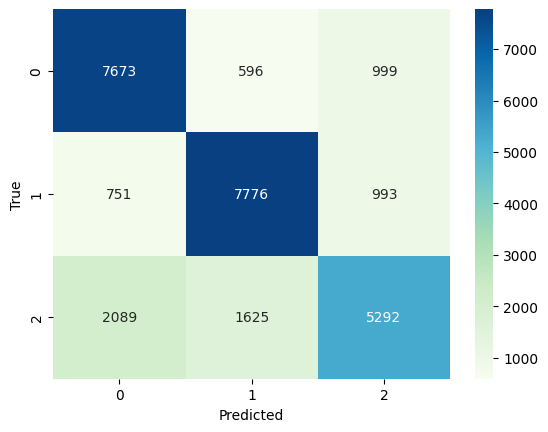

In [ ]:
tabla=confusion_matrix(y_train, y_pred_train)

sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Mostramos a traves de una matriz de heatmap comparando los valores predichos con los de tests.

Text(50.722222222222214, 0.5, 'True')

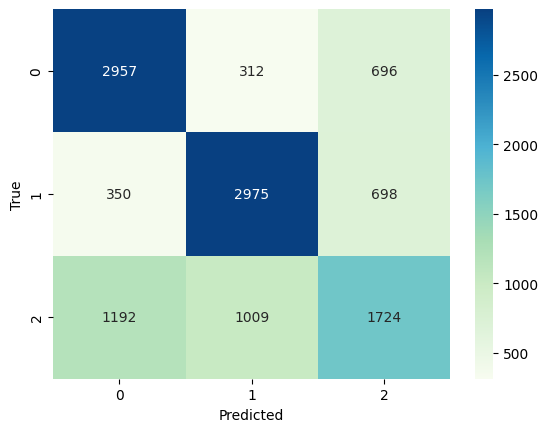

In [ ]:

tabla=confusion_matrix(y_test, y_pred_test)

sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Por este grafico de heatmap podemos ver que detecta muy bien el valor de alto y bajo, podemos decir que tiene un buen accuracy para detectar dicho tipo, pero para el caso de medio se observa una menor acurracy en la prediccion .

Tomamos las métricas.  

Primero con el conjunto de train:

In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

        alto       0.73      0.83      0.78      9268
        bajo       0.78      0.82      0.80      9520
       medio       0.73      0.59      0.65      9006

    accuracy                           0.75     27794
   macro avg       0.74      0.74      0.74     27794
weighted avg       0.75      0.75      0.74     27794



y con el conjunto de test:

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

        alto       0.66      0.75      0.70      3965
        bajo       0.69      0.74      0.72      4023
       medio       0.55      0.44      0.49      3925

    accuracy                           0.64     11913
   macro avg       0.63      0.64      0.63     11913
weighted avg       0.63      0.64      0.64     11913



Podemos ver que comparando ambas metricas, obtenemos mejora a grandes razgos en el conjunto de train.

Estas son las metricas base, a traves de la busqueda de hiperparametros vamos a mejorar las metricas y explicar cada una de ellas.

Importancia de Atributos

In [ ]:
sorted(list(zip(ds_arbol.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.28849062348349747),
 ('property_surface_total', 0.19605156864334428),
 ('longitud', 0.15268133306998646),
 ('property_surface_covered', 0.09800466823139144),
 ('barrio_MONTE CASTRO', 0.03947889761022181),
 ('property_rooms', 0.028240179756162467),
 ('precio_metro_cuadrado', 0.018036007770044247),
 ('property_bedrooms', 0.01645627933331298),
 ('barrio_BALVANERA', 0.01474797027070351),
 ('tipo_precio', 0.013885230746359216),
 ('barrio_PARQUE PATRICIOS', 0.013300335019538954),
 ('barrio_PATERNAL', 0.011962675236329769),
 ('barrio_BELGRANO', 0.009773112793708991),
 ('property_price', 0.008585480098970167),
 ('barrio_ABASTO', 0.006225934656601654),
 ('barrio_VILLA RIACHUELO', 0.005267858525632621),
 ('barrio_TRIBUNALES', 0.005227716555533921),
 ('barrio_RECOLETA', 0.0051647253265149325),
 ('barrio_COLEGIALES', 0.004660150060512538),
 ('barrio_VERSALLES', 0.0041471522925106905),
 ('barrio_MATADEROS', 0.0037202482948262877),
 ('barrio_CENTRO / MICROCENTRO', 0.003436930476035764

Aca estamos evaluando la importancia en los 50 arboles que generamos en conjunto. Podemos ver que el feature latitud tiene la importancia mas alta, por lo que nos permite graficar mejor. Esto se puede explicar, ya que como podemos ver en el mapa de Caba, hay una clara discretizacion agrupacion de los tipos de precio con las zonas. Por ejemplo, se puede ver una conglomeracion de puntos verdes por la zona de Palermo, por lo que no seria sorpresa que por esa zona haya un punto verde.

Busqueda de Hiperparámetros 

Al igual que en el arbol de decision tomamos la metrica de f1 score con un average de micro ya que no tenemos clases desbalanceadas porque utilizamos la alterantiva de frecuencias iguales, utilizando 5 folds. 

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import sklearn as sk


base_tree = RandomForestClassifier(oob_score=True, random_state=2, n_jobs=-1) 

#Cantidad de combinaciones que queremos probar
n = 10

#Conjunto de parámetros que queremos usar
params = {'criterion':['gini','entropy'],
            'max_features':['auto', 'sqrt', 'log2'],   
            'min_samples_leaf': [1,5,10],
            'min_samples_split':[2,4,10,12,14,16],
            'n_estimators':[10,20,50]
            }

#Cantidad de splits para el Cross Validation
folds = 5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score, average='micro')

#Random Search Cross Validation
randomcvRF = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n, error_score='raise') 

#Buscamos los hiperparamtros que optimizan F1 Score
randomcvRF.fit(x_train_arbol,y_train_arbol)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=2),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 4, 10, 12, 14,
                                                              16],
                                        'n_estimators': [10, 20, 50]},
                   scoring=make_scorer(f1_score, average=micro))

Mostramos los mejores parámetros obtenidos con Random CrossValidation

In [ ]:
randomcvRF.best_params_

{'n_estimators': 20,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'criterion': 'gini'}

Mostramos la mejor métrica

In [ ]:
print("accuracy en entrenamiento con cv: " + str(randomcvRF.best_score_))

accuracy en entrenamiento con cv: 0.656292532958461


Ahora entrenamos el modelo con los mejores hiperparametros

In [ ]:
rf_cv_best=randomcvRF.best_estimator_
y_pred_rf_cv_best_test = rf_cv_best.predict(x_test_arbol)

Graficamos el arbol:

Mostramos las clases y que parametros tiene

In [ ]:
rf_cv_best.classes_

array(['alto', 'bajo', 'medio'], dtype=object)

In [ ]:
rf_cv_best.estimators_[48]

IndexError: list index out of range

Mostramos las reglas del arbol y luego lo graficamos

In [ ]:

# reglas = export_text(rf_cv_best, feature_names=list(ds_arbol_x.columns))
# print(reglas)

REGLASSSSS

Generalmente las features de las primeras ramas son similares entre todos los arboles, a medida que bajamos en las ramas estas cambian.

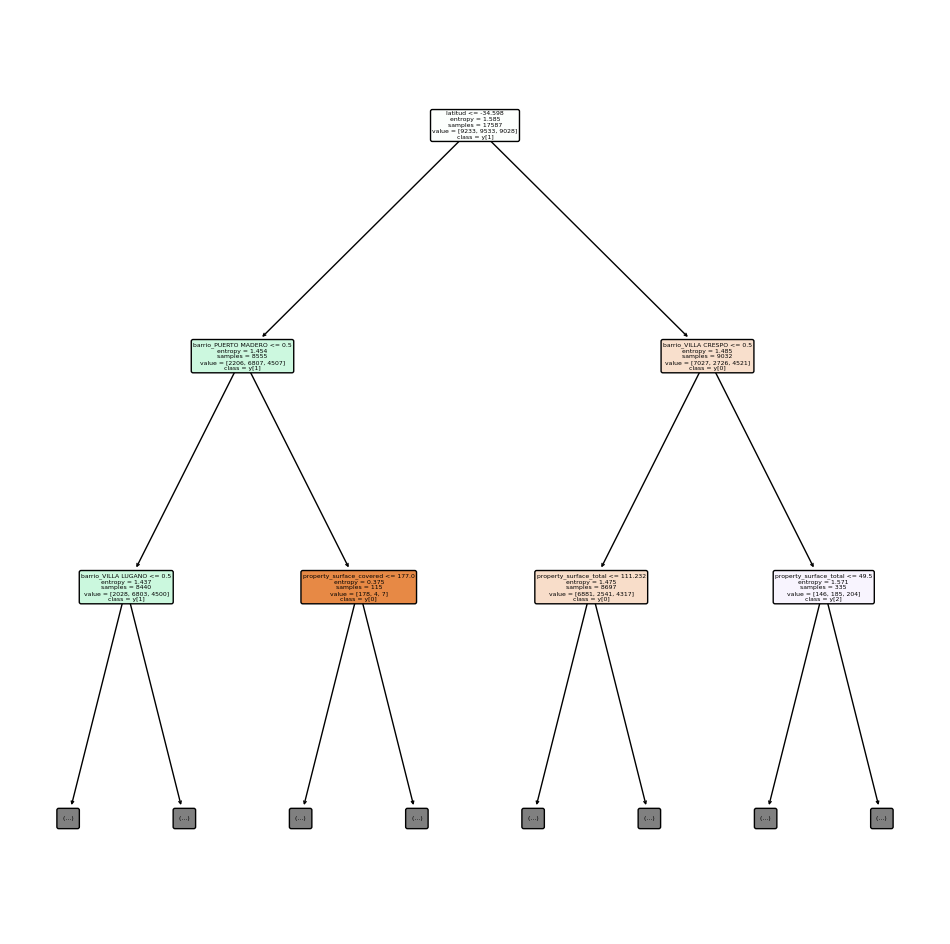

In [ ]:
plt.figure(figsize=(12,12))

tree_plot=tree.plot_tree(rf_cv_best.estimators_[48],
                         max_depth=2,
                         feature_names=ds_arbol_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

Con los valores predichos y los de tests armamos una tabla de confusion para mostrar cuan acertado estuvo el modelo.

Text(50.722222222222214, 0.5, 'True')

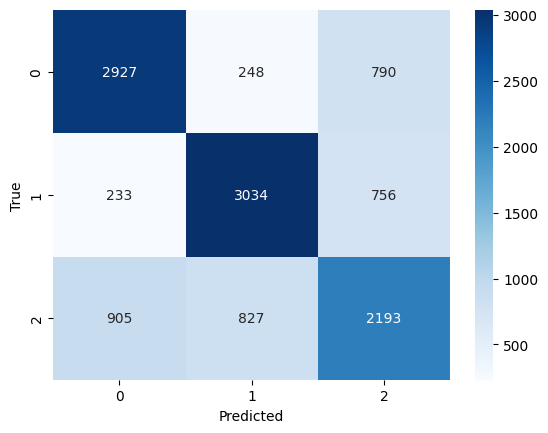

In [ ]:

tabla=confusion_matrix(y_test_arbol,y_pred_rf_cv_best_test)
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Mediante este heatmap se puede ver que al obtener los mejores hiperparametros, pudimos obtener una clara mejoria de la precision del arbol comparando el test con el predicho.

Podemos ver que seguimos teniendo un buen resultado para las columnas de alto y bajo, pero hay un leve retroceso del rendimiento para predecir la clase medio,  por lo que la accuracy nos podria llegar a estar mintiendo.

In [ ]:
print(classification_report(y_test,y_pred_rf_cv_best_test))

              precision    recall  f1-score   support

        alto       0.72      0.74      0.73      3965
        bajo       0.74      0.75      0.75      4023
       medio       0.59      0.56      0.57      3925

    accuracy                           0.68     11913
   macro avg       0.68      0.68      0.68     11913
weighted avg       0.68      0.68      0.68     11913



Podemos ver que la precision (numero de true positives dividido por la cantidad del todos los resultados positivos (true positive), incluyendo aquellos que no se identificaron correctamente(false positive)) de la columna de tipo "medio" es mas baja con respecto a la de alto y bajo. Se puede confirmar  mirando el heatmap en la ultima fila, donde el porcentaje de aciertos sobre el total es menor que el de alto y bajo.   

Para el caso de recall (numero de true positives dividido por el numero de ejemplos que deberian de haber sido identificados como positivos(true positive + false negative)) pasa algo similar con las 3 tipos de precio, tomando una menor proporcion en el caso del tipo "medio".

Despues tenemos el f1 score que seria la media armónica entre la presicion y el recall.

La accuracy del modelo es bastante buena, esta es fracción de predicciones que el modelo realizó correctamente sobre el total, por lo que no nos dice mucho de cada tipo por separado.

Por otro lado, macro average utiliza la media aritmetica para todas las metricas del f1 score, por ejemplo para el recall hace (0.76+0.76+0.59)/3. Esta metrica es la mas directa para mostrarnos como esta funcionando el modelo, y en nuestro caso, es bastante buena.

Por ultimo tenemos la weighted average que es similar a la macro average pero toma en cuenta el support de cada metrica del f1score para dar un resultado, nuevamente nos dio bastante bien para todas las metricas evaluadas.

Hacemos lo mismo para el conjuno de train:

In [ ]:
rf_cv_best=randomcvRF.best_estimator_
y_pred_rf_cv_best_train = rf_cv_best.predict(x_train_arbol)

Text(50.722222222222214, 0.5, 'True')

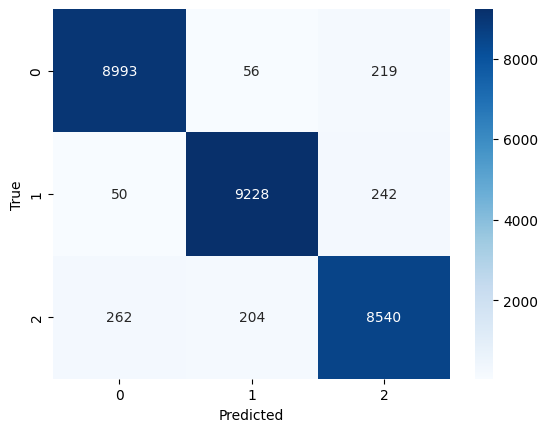

In [ ]:
tabla=confusion_matrix(y_train_arbol,y_pred_rf_cv_best_train)
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
print(classification_report(y_train,y_pred_rf_cv_best_train))

              precision    recall  f1-score   support

        alto       0.97      0.97      0.97      9268
        bajo       0.97      0.97      0.97      9520
       medio       0.95      0.95      0.95      9006

    accuracy                           0.96     27794
   macro avg       0.96      0.96      0.96     27794
weighted avg       0.96      0.96      0.96     27794



En comparacion con el conjunto de test, en el conjunto de train obtenemos una muy buena prediccion con respecto a los datos iniciales. En conjunto a esto, obtuvimos un buen reporte de las metricas previamente explicadas.

## Modelo 3: KNN

El algoritmo K-Nearest Neighbors, o simplemente KNN, es un algoritmo el cual, dado un punto y evaluando sus "k" vecinos para encontrar similitudes, intenta predecir un atributo o propiedad de dicho punto. Se puede utilizar para clasificación o regresión.

El algoritmo se basa en la idea de que los puntos de propiedades similares se encontrarán a poca distancia entre sí, mientras que, a mayor desemejanza, mayor distancia. Esta distancia no es necesariamente la euclideana, sino que se pueden utilizar diversos tipos de distancia.

ACA VA UNA FOTO

En el ejemplo de arriba, se puede observar que 4 de los puntos más cercanos al punto que se busca clasificar (la X) son triángulos azules, mientras que la distancia a los círculos negros y cuadrados rojos es considerablemente mayor. Es en base a este sencillo análisis que se podría predecir que el punto X es un triángulo azul.

Importamos las librerias que usaremos:

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Separamos los conjuntos de Train y Test

In [ ]:
#Separo conjunto de Train y de Test (80/20)
ds_KNN_clasificación = ds_properati.copy()
ds_KNN_clasificación = pd.get_dummies(ds_KNN_clasificación, columns=['property_type', 'barrio'])
ds_KNN_clasificación.drop(columns=['created_on', 'property_currency', 'operation', 'provincia'], inplace=True)
ds_KNN_clasificación_x = ds_KNN_clasificación.drop(['property_price','precio_metro_cuadrado','tipo_precio'], axis='columns', inplace=False)
ds_KNN_clasificación_y = ds_KNN_clasificación['tipo_precio'].copy()

x_train_KNN, x_test_KNN, y_train_KNN, y_test_KNN = train_test_split(ds_KNN_clasificación_x,
                                                                    ds_KNN_clasificación_y,
                                                                    test_size=0.3,
                                                                    random_state=2)


A continuación se crea el clasificador KNN con los parámetros por defecto.

In [ ]:
#Crear el modelo
KNN_Classifier = KNeighborsClassifier()

#vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Se puede observar que, entre algunos de los hiperparámetros con los que cuenta el clasificador, se destacan **metric**, que representa el tipo de distancia a calcular (en este caso Minkowski); y **weigth**, que representa la influencia de cada punto en función de la distancia (en este caso, al ser uniforme, a cada vecino se le asigna el mismo peso). 

Se entrena el modelo con Cross Validation y se realiza una predicción en base al set de testing separado en un inicio.

In [ ]:
#Entrenar el modelo
KNN_Classifier.fit(x_train_KNN, y_train_KNN)

#Predicción sobre test
y_pred_KNN_clasificacion = KNN_Classifier.predict(x_test_KNN)

Se puede observar que, de 11685 predicciones totales, hubo 6766 entradas clasificadas correctamente, lo cual equivale a una precisión del 54.2%, aproximadamente, lo cual es bastante pobre.

In [ ]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test_KNN == y_pred_KNN_clasificacion))
print('total: ', len(y_test_KNN))

correctas:  6945
total:  11913


In [ ]:
accuracy_score(y_test,y_pred)

0.5352975740787375

A fin de mejorar el modelo, se procede a entrenar distintos modelos los cuales toman una cantidad incremental de vecinos para calcular las distancias. De esta forma se puede observar gráficamente cuál es el mejor valor para settear como hiperparámetro de la cantidad de nodos vecinos.

In [ ]:
metrics = []

for n in range(1,15):  #El algoritmo tarda una buena cantidad de tiempo con un rango de 1 a 15.
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train_KNN, y_train_KNN)
    y_pred = knn.predict(x_test_KNN)
    metrics.append((n, (y_test_KNN == y_pred).sum()))

Se grafica la relación entre precisión y número de vecinos.

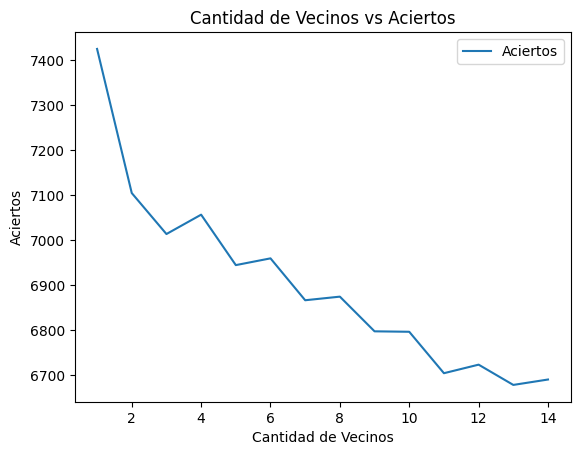

In [ ]:
df_metrics = pd.DataFrame(metrics, columns=['Cantidad de Vecinos', "Aciertos"])

ax = df_metrics.plot(x="Cantidad de Vecinos", y="Aciertos", title = "Cantidad de Vecinos vs Aciertos")
ax.set_ylabel("Aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()

Es posible que a mayor cantidad de vecinos que 14 el número de aciertos vuelva a aumentar, pero el tiempo de procesamiento de tantas iteraciones aumenta considerablemente.

Se decide probar la variación haciendo uso de Cross-Validation.

In [ ]:
from sklearn.model_selection import cross_val_score

k_range=range(1,5) #cantidad de vecinos a probar

k_scores=[] # accuracy para cada K utilizado

for k in k_range:
    #clasificador Knn
    knn=KNeighborsClassifier(n_neighbors=k)
    #uso 10 folds
    scores=cross_val_score(knn,x_train_KNN,y_train_KNN,cv=10,scoring='accuracy')
    #promedio las 10 métricas
    k_scores.append(scores.mean())

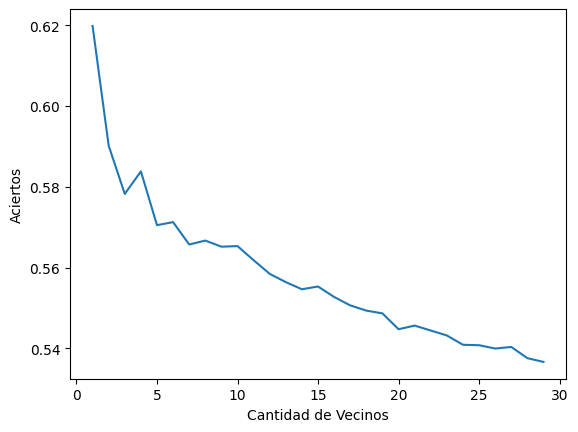

In [ ]:
plt.plot(k_range, k_scores)
plt.xlabel("Cantidad de Vecinos")
plt.ylabel("Aciertos")
plt.show()

Se puede notar que no es lo mismo dejar un valor arbitrario de cantidad de vecinos, ya que hay una tendencia a que la performance descienda a medida que que aumenta la cantidad de vecinos. Se puede observar que la excepción a esta regla ocurre con 4 como cantidad de vecinos. Si bien en 1 la predicción es lo más alta, esto resulta susceptible a outliers y overfitting.

Optimización de Hiperparámetros

El número de vecinos no es el único hiperparámetro que se puede optimizar. Entre algunos otros se encuentran:

**algorithm:** algoritmo utilizado para calcular los vecinos más cercanos.
**brute:** utilizará una búsqueda de fuerza bruta.
**metric:** Tipo de distancia (euclidea, minkowski, manhattan, etc).
**weights:** Relación entre influencia de un vecino y la distancia al punto a predecir.

Se realiza una búsqueda de los mejores hiperparámetros para número de vecinos, peso, algoritmo y distancia. Si bien hay una gran cantidad de posibles distancias para utilizar, distancia euclidea, manhattan y chebyshev son métricas válidas tanto para los algoritmos de ball_tree, kd_tree y brute.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,5), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)

rand.fit(x_train_KNN, y_train_KNN)
rand.cv_results_['mean_test_score']

array([0.62693346, 0.54026004, 0.54076433, 0.62153677, 0.59016307,
       0.62304804, 0.62042161, 0.62150079, 0.54670059, 0.62042161])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
0.6269334629453688


Se puede observar que el valor de la cantidad de vecinos fue optimizada en 4, lo cual coincide con la observación realizada con anterioridad.

A continuación se realizan las predicciones con este nuevo modelo y se calcula su performance, la cual es de un 63% de aciertos.

In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred_KNN_clasificacion=best_knn.predict(x_test_KNN)

#Accuracy test
accuracy_score(y_test_KNN,y_pred_KNN_clasificacion)

0.6312431797196341

              precision    recall  f1-score   support

        alto       0.66      0.68      0.67      3965
        bajo       0.69      0.68      0.69      4023
       medio       0.54      0.53      0.53      3925

    accuracy                           0.63     11913
   macro avg       0.63      0.63      0.63     11913
weighted avg       0.63      0.63      0.63     11913



Text(50.722222222222214, 0.5, 'True')

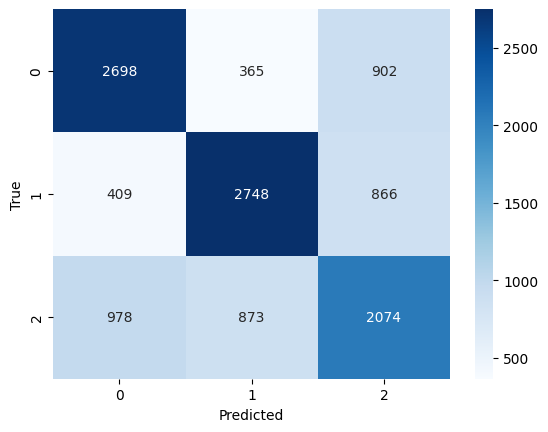

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test_KNN,y_pred_KNN_clasificacion))

#Matriz de Confusión
cm = confusion_matrix(y_test_KNN,y_pred_KNN_clasificacion)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fcb02109-3268-4805-81b4-1fba96795907' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>